##  Лабораторная работа 2: Анализ данных с Pandas и корреляцией
В этом ноутбуке мы будем использовать библиотеки **Pandas**, **Seaborn** и **Matplotlib** для анализа данных о мозге и данных пассажиров Titanic. Цель — научиться работать с данными и выполнять базовый корреляционный анализ.

## Часть 1: Введение в Pandas

Pandas - это библиотека Python для работы с данными. Она предоставляет мощные инструменты для анализа и манипуляции данными.

### Установка Pandas

Для начала убедитесь, что у вас установлена библиотека Pandas. Если ее нет, установите ее с помощью команды:


In [61]:
! pip install pandas


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\ozgur\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Импорт библиотеки
Давайте начнем с импорта библиотеки Pandas:

In [3]:
import pandas as pd
titanic = pd.read_csv('titanic.csv')

## Часть 2: Работа с данными
### Чтение данных
Мы будем использовать датасет Titanic. Давайте прочитаем данные из CSV файла.

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Предпросмотр данных
Для первого ознакомления с данными давайте выведем первые несколько строк.

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Информация о данных
Чтобы получить общую информацию о данных, воспользуйтесь методом .info().

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Работа с NaN
Часто данные содержат пропущенные значения, которые представляются как NaN (Not a Number). Pandas предоставляет удобные методы для работы с ними.

Проверка на наличие NaN. Методы fillna и dropna возвращают новые Dataframe, проверьте нет ли в них NaN

In [7]:
titanic.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


Заполнение NaN

In [8]:
titanic.fillna(0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Удаление строк с NaN

In [9]:
titanic.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


## Часть 3: Обработка DataFrame
### Выбор данных
Pandas позволяет выбирать данные по индексам, меткам столбцов и условиям.

In [10]:
titanic['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

### Сортировка данных
Сортировка данных по значениям столбцов.

In [11]:
titanic[['Age', 'Fare']]

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


### Группировка данных
Pandas также позволяет группировать данные и выполнять агрегирующие операции.

In [12]:
titanic.loc[0:4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Часть 4: Задания для практики
Прочитайте данные из файла 'titanic.csv'.
Проверьте, есть ли пропущенные значения в данных и заполните их нулями.
Выведите первые 10 строк данных.
Выберите только те строки, где значение в столбце 'Age' больше 30.
Отсортируйте данные по столбцу 'Fare' в порядке убывания.
Сгруппируйте данные по столбцу 'Pclass' и вычислите средний возраст ('Age') для каждого класса.

In [13]:
import pandas as pd

titanic = pd.read_csv('titanic.csv')
titanic.fillna(0, inplace=True)
print(titanic.head(10))
print(titanic[titanic['Age'] > 30])
print(titanic.sort_values(by='Fare', ascending=False))
print(titanic.groupby('Pclass')['Age'].mean())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   0.0      0   
6                            McCarthy, Mr. Timothy J    male  54

##  Раздел 2: Корреляционный анализ

# Лабораторная работа - Корреляционный анализ в Python


### Цели

* Часть 1: Набор данных
* Часть 2: Диаграммы рассеяния и корреляционные переменные
* Часть 3: Расчёт корреляции с Python
* Часть 4: Визуализация

### История / Cценарий

Корреляция является важной статистической зависимостью, которая может указывать, связаны ли линейные значения переменных.

В этой лабораторной работе вы узнаете, как использовать Python для расчета корреляции. В Части 1 Вы подготовите набор данных. В Части 2 Вы узнаете, как определить, являются ли переменные в данном наборе данных взаимозависимыми. Наконец, в Части 3, Вы будете использовать Python для вычисления корреляции между двумя наборами переменных.

### Необходимо:
* Библиотеки Python: pandas, numpy, matplotlib, seaborn
* Файл данных: brainsize.txt

## Часть 1: Набор данных

Вы будете использовать набор данных, который содержит выборку 40 студентов правшей с вводного курса по Психологии из университета Southwestern. Испытуемые прошли четыре субтеста (Vocabulary, Similarities, Block Design, и Picture Completion) для расчёта шкалы интеллекта взрослых по Векслеру. Исследователи использовали магнитно-резонансную томографию (МРТ) для определения размера мозга у субъектов. Также включены сведения о гендерных показателях и размере тела (рост и вес). Исследователи скрыли вес двух испытуемых и высоту одного из них по причинам конфиденциальности.
Для набора данных были применены две простые модификации:

1. Заменены вопросительные знаки, используемые для представления скрытых данных, описанных выше, строкой «NaN». Замена была выполнена, потому что Pandas не обрабатывает вопросительные знаки правильно.

2. Заменены все символы табуляции запятыми, преобразуя набор данных в набор данных CSV.

Готовый набор данных сохранён как `brainsize.txt`.

#### Шаг 1: Загрузка набора данных из файла.

До того, как набор данных можно использовать, он должен быть загружен в память.

В приведенном ниже коде первая строка импортирует модули `pandas` и определяет `pd` как дескриптор, который ссылается на один из модулей.

Вторая строка загружает CSV-файл набора данных в переменную с именем `brainFile`.

Третья строка использует метод `read_csv()` из библиотеки `pandas`, чтобы преобразовать набор данных CSV, хранящийся в `brainFile` в кадр данных. Затем кадр данных хранится в переменной `brainFrame`.

Запустите ячейку ниже, чтобы выполнить описанные функции.

In [17]:
import pandas as pd
brainFrame = pd.read_csv("brainsize.txt", delimiter='\t')

#### Шаг 2. Проверка кадра данных.

Чтобы убедиться, что кадр данных правильно загружен и создан, используйте метод `head()`. Метод `head()` отображает первые пять записей в кадре данных.

Метод head() принимает параметр - число строк, отобразите первые 10 строк таблицы

In [24]:
brainFrame.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545


Также Dataframe имеет метод tail(), который возвращает последние 5 строк кадра данных. Аналогично head() метод tail() принимает аргументом число строк, которые он вернет. Отобразите последние 8 строк таблицы.

In [27]:
brainFrame.tail(8)

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
32,Male,103,96,110,192.0,75.5,997925
33,Male,90,96,86,181.0,69.0,879987
34,Female,83,90,81,143.0,66.5,834344
35,Female,133,129,128,153.0,66.5,948066
36,Male,140,150,124,144.0,70.5,949395
37,Female,88,86,94,139.0,64.5,893983
38,Male,81,90,74,148.0,74.0,930016
39,Male,89,91,89,179.0,75.5,935863


## Часть 2: Диаграммы рассеяния и корреляционные переменные

#### Шаг 1: метод `describe()` в библиотеке pandas.
Библиотека pandas включает в себя метод `describe()`, который выполняет одни и те же общие вычисления на предложенном наборе данных. Помимо базовых операций таких, как подсчёт, расчёт среднего значения, расчёт среднеквадратического отклонения, расчёт минимума, и максимума,  `describe()` также отличный способ быстро проверить достоверность значений в кадре данных.<p>
Ниже используйте функцию describe, для вывода статистики по данным

In [28]:
brainFrame.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


#### Шаг 2: Диаграммы рассеяния

Диаграммы рассеяния важны при работе с корреляциями, поскольку они позволяют быстро визуально проверить природу связи между переменными. В этой лабораторной работе используется коэффициент корреляции Пирсона, который чувствителен только к линейной зависимости между двумя переменными. Также существуют другие более надежные методы корреляции, но они выходят за рамки этой лабораторной работы.

##### a. Загрузите необходимые модули.
Прежде чем строить графики, необходимо импортировать несколько модулей, а именно `numpy` и `matplotlib`. Запустите ячейку ниже, чтобы загрузить эти модули.

In [29]:
import numpy as np
import matplotlib.pyplot as plt

##### b. Разделите данные.
Чтобы гарантировать, что результаты не будут искажены из-за различий в мужских и женских телах, кадр данных разбит на два: один содержит все мужские записи, а другой - только женские экземпляры. <p>
Создайте два новых кадра данных: menDf и womenDf, каждый из которых содержит соответствующие записи.

In [33]:
menDf = brainFrame[brainFrame['Gender'] == 'Male']
womenDf = brainFrame[brainFrame['Gender'] == 'Female']
print(brainFrame.columns)

Index(['Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height', 'MRI_Count'], dtype='object')


##### c. Постройте графики.
Поскольку набор данных включает в себя три различных измерения интеллекта (PIQ, FSIQ и VIQ), первая строка ниже использует метод `mean()` из библиотеки Pandas для вычисления среднего значения между тремя измерениями и сохранения результата в переменной `menMeanSmarts`. Обратите внимание, что первая строка относится к menDf, отфильтрованному кадру данных, содержащему только мужские записи.<p>
Вторая строка использует метод `scatter()` библиотеки `matplotlib` для создания графика диаграммы рассеяния между переменной `menMeanSmarts` и атрибутом `MRI_Count`. MRI_Count в этом наборе данных можно рассматривать как меру физического размера мозга испытуемых.<p>
Третья строка просто отображает график.<p>
Четвертая строка используется для гарантированного отображения графика в этом блокноте.

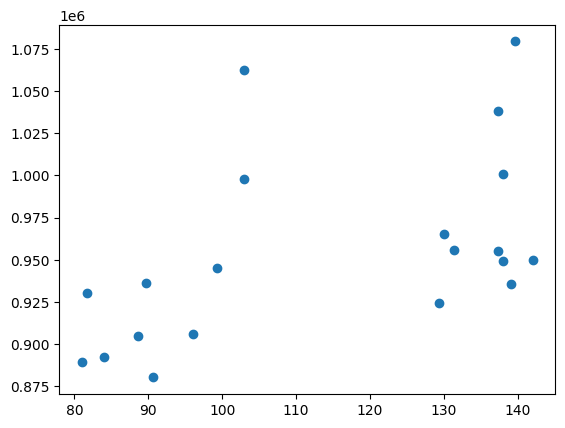

In [34]:
# Ячейка для кода № 6
menMeanSmarts = menDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(menMeanSmarts, menDf["MRI_Count"])
plt.show()
%matplotlib inline

Аналогичным образом создайте график диаграммы рассеяния для кадра данных, содержащему только женские записи.

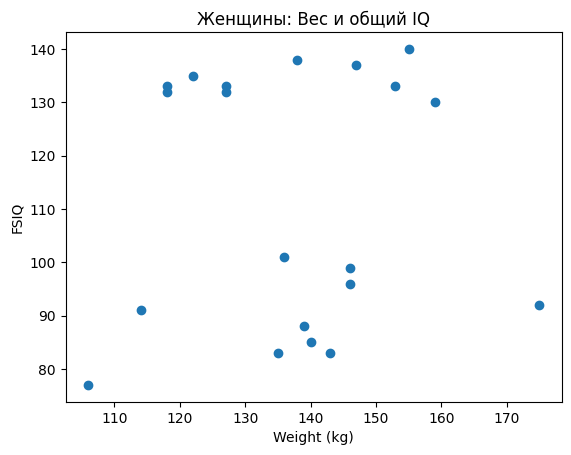

In [40]:

womenDf = brainFrame[brainFrame['Gender'] == 'Female']


plt.scatter(womenDf['Weight'], womenDf['FSIQ'])
plt.xlabel('Weight (kg)')
plt.ylabel('FSIQ')
plt.title('Женщины: Вес и общий IQ')
plt.show()

## Часть 3: Вычисление корреляции с Python


#### Шаг 1: Рассчитайте корреляцию для brainFrame.
Метод `corr()` библиотеки pandas обеспечивает простой способ вычисления корреляции для кадра данных. Просто применяя метод на кадре данных, можно получить корреляцию между всеми переменными одновременно.


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\ozgur\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----------- ---------------------------- 81.9/294.9 kB 1.2 MB/s eta 0:00:01
   ----------- ---------------------------- 81.9/294.9 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.8 MB/s eta 0:00:00
Pearson Korelasyon Matrisi:
               FSIQ       VIQ       PIQ    Weight    Height  MRI_Count
FSIQ       1.000000  0.946639  0.934125 -0.051483 -0.086002   0.357641
VIQ        0.946639  1.000000  0.778135 -0.076088 -0.071068   0.337478
PIQ        0.934125  0.778135  1.000000  0.002512 -0.076723   0.386817
Weight    -0.051483 -0.076088  0.002512  1.000000  0.699614   0.513378
Height    -0.086002 -0.071068 -0.076723  0.699614  1.000000   0.601712
MRI_Count  0.357641  0.337478  0.386817  0.513378  0.601712   1.000000


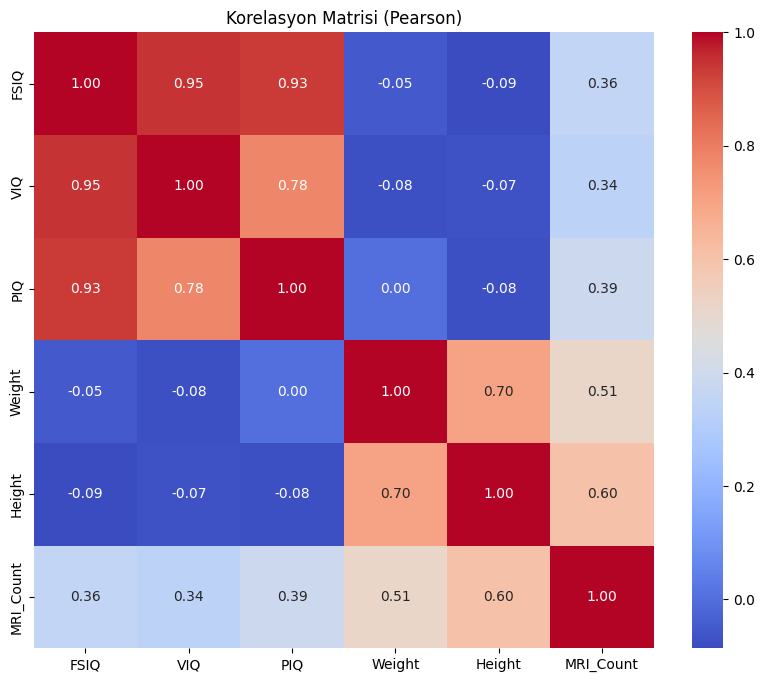

In [45]:
! pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

brainFrame = pd.read_csv("brainsize.txt", delimiter="\t")


numeric_df = brainFrame.select_dtypes(include='number')


corr_matrix = numeric_df.corr(method='pearson')


print("Pearson Korelasyon Matrisi:")
print(corr_matrix)


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasyon Matrisi (Pearson)')
plt.show()

Обратите внимание на диагональ слева направо в таблице корреляции, сгенерированной выше. Почему диагональ заполнена значениями 1? Это совпадение? Объясните.

Нет, это не совпадение. Значения на диагонали всегда равны 1, потому что каждая переменная идеально коррелирует сама с собой. Это означает, что коэффициент корреляции между одной и той же переменной всегда равен 1.



Продолжая смотреть на таблицу корреляции выше, обратите внимание, что значения зеркалируются; значения под диагональю имеют зеркальный аналог над ней. Это совпадение? Объясните.

Это не совпадение. Корреляционная матрица симметрична по диагонали, потому что корреляция между переменной A и B равна корреляции между переменной B и A. Поэтому значения выше и ниже диагонали одинаковы и зеркально отражаются.s

Используя тот же метод `corr()`, вычислите корреляцию переменных, содержащихся в кадре с женскими записями:

In [47]:
womenDf.select_dtypes(include='number').corr(method='pearson')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.955717,0.939382,0.038192,-0.059011,0.325697
VIQ,0.955717,1.000000,0.802652,-0.021889,-0.146453,0.254933
PIQ,0.939382,0.802652,1.000000,0.113901,-0.001242,0.396157
Weight,0.038192,-0.021889,0.113901,1.000000,0.552357,0.446271
Height,-0.059011,-0.146453,-0.001242,0.552357,1.000000,0.174541
MRI_Count,0.325697,0.254933,0.396157,0.446271,0.174541,1.000000


И то же самое можно сделать для переменных, содержащихся в кадре с мужскими записями:

In [49]:
menDf = brainFrame[brainFrame['Gender'] == 'Male']

# Sadece sayısal sütunlar
menNumeric = menDf.select_dtypes(include='number')

# Pearson korelasyon matrisini hesapla
corr_men = menNumeric.corr(method='pearson')

# Matris çıktısını göster
print("Мужчины — корреляционная матрица:")
print(corr_men)

Мужчины — корреляционная матрица:
               FSIQ       VIQ       PIQ    Weight    Height  MRI_Count
FSIQ       1.000000  0.944400  0.930694 -0.278140 -0.356110   0.498369
VIQ        0.944400  1.000000  0.766021 -0.350453 -0.355588   0.413105
PIQ        0.930694  0.766021  1.000000 -0.156863 -0.287676   0.568237
Weight    -0.278140 -0.350453 -0.156863  1.000000  0.406542  -0.076875
Height    -0.356110 -0.355588 -0.287676  0.406542  1.000000   0.301543
MRI_Count  0.498369  0.413105  0.568237 -0.076875  0.301543   1.000000


## Часть 4: Визуализация

#### Шаг 1: Установите Seaborn.
Чтобы упростить визуализацию корреляций данных, можно использовать тепловую карту. На основе цветных квадратов тепловая карта может помочь выявить корреляции с первого взгляда.

Модуль Python с именем `seaborn` очень упрощает построение тепловых карт.

Сначала запустите ячейку ниже, чтобы загрузить и установить модуль `seaborn`. (закомментируйте, если библиотека установлена)

In [50]:
# Ячейка для кода № 11
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\ozgur\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


#### Шаг 2: Нарисуйте корреляционную тепловую карту.

Теперь, когда кадры данных готовы, можно отобразить тепловые карты. Далее приведен анализ кода из ячейки ниже:

Строка 1: Создает таблицу корреляции, основанную на фрейме данных `womenNoGenderDf` и хранит его в `wcorr`.<br>
Строка 2: Использует метод `heatmap()` библиотеки `seaborn` для генерации и построения тепловой карты. Обратите внимание, что `heatmap()` принимает `wcorr`, как параметр.<br>
Строка 3: используется для экспорта и сохранения созданной тепловой карты в виде PNG-изображения. Хотя строка 3 не активна (перед ней стоит символ `#`, заставляя интерпретатор игнорировать ее), она сохранена в информационных целях.

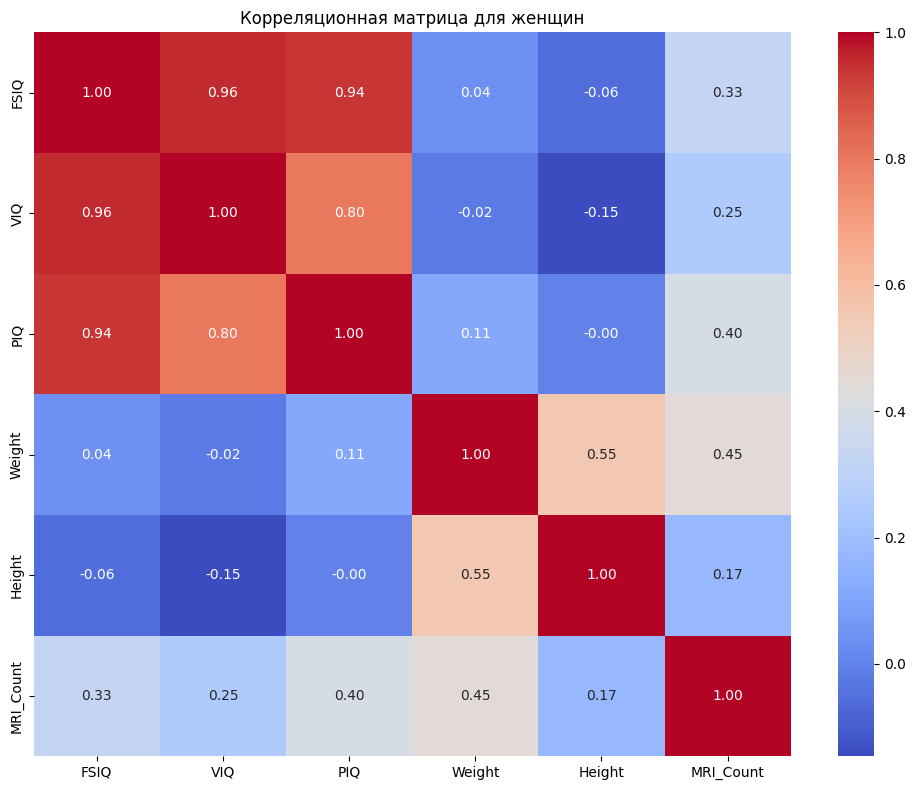

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sadece sayısal sütunları seçiyoruz
wcorr = womenDf.select_dtypes(include='number').corr()

# Korelasyon matrisi çizimi
plt.figure(figsize=(10, 8))
sns.heatmap(wcorr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица для женщин')
plt.tight_layout()
plt.show()

Аналогичным образом создайте и отобразите тепловую карту для кадра данных с мужчинами.

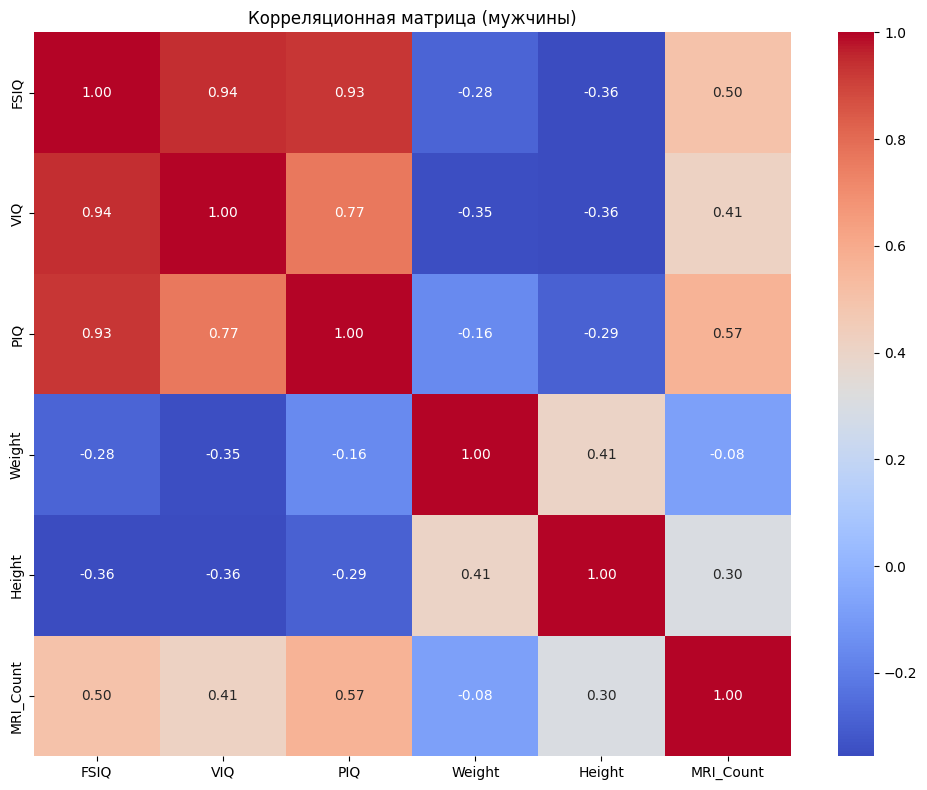

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

mcorr = menDf.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 8))
sns.heatmap(mcorr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица (мужчины)')
plt.tight_layout()
plt.show()

У многих пар переменных корреляция близка к нулю. Что это значит?

Если корреляция между двумя переменными близка к нулю, это означает, что между ними нет линейной зависимости. Другими словами, изменение одной переменной не связано с предсказуемым изменением другой. Однако это не исключает наличие других, нелинейных зависимостей.

Зачем делать разделение по полу?

Разделение по полу позволяет выявить скрытые различия в корреляциях между переменными у мужчин и женщин. Пол может влиять на физиологические параметры, такие как вес, рост и объём мозга. Без разделения усреднённые данные могут маскировать важные особенности, характерные только для одной из групп.

Какие переменные имеют более сильную корреляцию с размером мозга (MRI_Count)? Это ожидалось? Объясните.

Наиболее сильную положительную корреляцию с размером мозга (MRI_Count) показывают переменные вес (Weight) и рост (Height). Это ожидаемо, так как размер тела напрямую влияет на размер мозга с точки зрения анатомии: у более крупных людей, как правило, объём мозга больше. Однако важно отметить, что большая масса мозга не обязательно связана с более высоким интеллектом.

In [54]:
# Загрузка данных о мозге
import pandas as pd
brainsize = pd.read_csv('brainsize.txt', sep='\t')
brainsize.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545


In [55]:
# Преобразование и статистика
brainsize['Weight'] = pd.to_numeric(brainsize['Weight'], errors='coerce')
brainsize.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


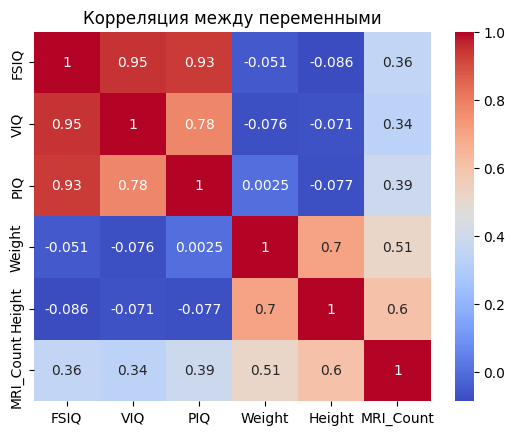

In [56]:
# Корреляционная матрица и тепловая карта
import seaborn as sns
import matplotlib.pyplot as plt
corr = brainsize.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Корреляция между переменными')
plt.show()

## Анализ Titanic данных

In [57]:
# Загрузка данных Titanic
titanic = pd.read_csv('titanic.csv')
titanic[['Survived', 'Age', 'Sex', 'Pclass']].head()

,Survived,Age,Sex,Pclass
0,0,22.0,male,3
1,1,38.0,female,1
2,1,26.0,female,3
3,1,35.0,female,1
4,0,35.0,male,3


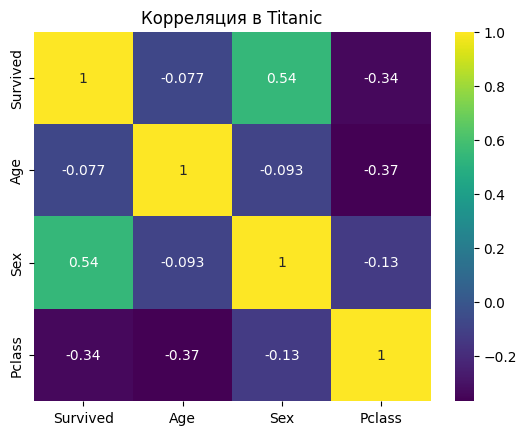

In [58]:
# Корреляция в Titanic (с преобразованием категориальных данных)
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
titanic_corr = titanic[['Survived', 'Age', 'Sex', 'Pclass']].corr()
sns.heatmap(titanic_corr, annot=True, cmap='viridis')
plt.title('Корреляция в Titanic')
plt.show()

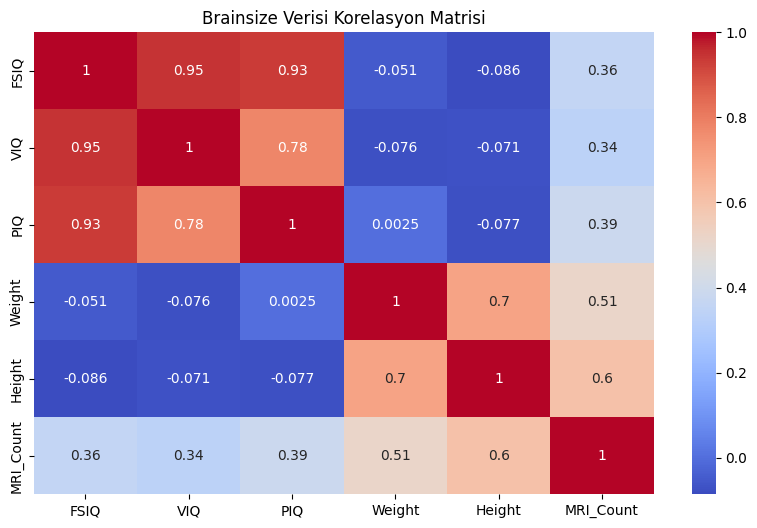

In [59]:
# Korelasyon matrisi ve ısı haritası
corr = brainsize.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Brainsize Verisi Korelasyon Matrisi')
plt.show()

###  5. Дополнительный анализ с данными Титаника

C:\Users\ozgur\AppData\Local\Temp\ipykernel_14956\2051784424.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)


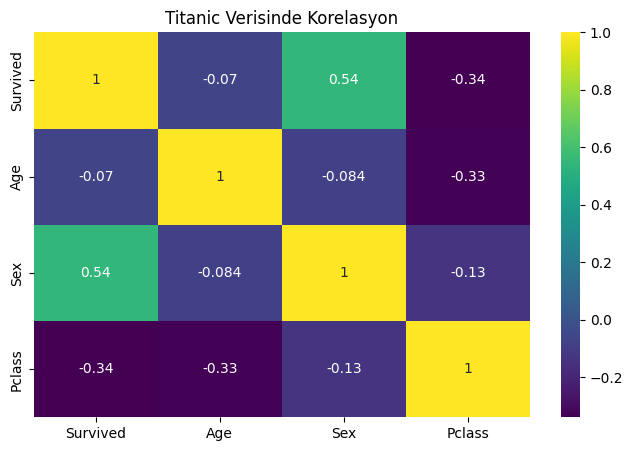

In [60]:
# Titanic verisini yükle
titanic = pd.read_csv('titanic.csv')
# Cinsiyet kategorik verisini sayısal değere çevir
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
# Eksik yaşları ortalama ile doldur
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic_corr = titanic[['Survived', 'Age', 'Sex', 'Pclass']].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(titanic_corr, annot=True, cmap='viridis')
plt.title('Titanic Verisinde Korelasyon')
plt.show()